Laboratório 2
Inserir texto

In [3]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [6]:
fname = file.path("ME315", "voos", "flights_small.csv.zip")
fname
file.exists(fname) #Comando para conferir se o arquivo fname, no qual gravamos o banco de dados, existe

[1] "ME315/voos/flights_small.csv.zip"

[1] TRUE

Q1. As estatísticas suficientes para a determinação do atraso percentual pela combinação dia-mes-cia são:

a) número total de atrasos da combinação;
b) número total de voos da combinação

Q2. Construção da função getStats.

In [14]:
getStats = function(input, pos){
    # DAY, MONTH, AIRLINE, ARRIVAL_DELAY são os argumentos a serem trazidos pelo argumento input
    # Sabendo que as siglas da companhias aereas são AA, DL, UA, US, fazemos o seguinte para pegar apenas os valores referentes a elas, que são representadas pela variável AIRLINE:
    input %>%
        filter (AIRLINE %in% c("AA", "DL", "UA", "US")) %>%
    # Para remover as observações faltantes, podemos utilizar:
        filter (!is.na(DAY), !is.na(MONTH), !is.na(ARRIVAL_DELAY))  %>%
    # Para agrupar os valores, utilizamos o group_by:
        group_by(DAY, MONTH, AIRLINE) %>% 
    # Para determinar as estatísticas suficientes apontadas anteriormente utilizamos o summarize. Dica: SEMPRE que estivermos reduzindo a quantidade de linhas em um banco de dados devemos utilizar summarize nesta etapa.
        summarize(n = n(), atrasos=sum(ARRIVAL_DELAY > 10))
    #Nesse summarize n = n() pega a quantidade de voos (linhas), e o atrasos é dado pela soma de voos com atraso acima de 10 minutos (especificado no exercício como caracterização de atraso na chegada)
}

Q3. Construção da função de callback.

In [15]:
stats = read_csv_chunked(fname,
                        callback=DataFrameCallback$new(getStats),
                        #cada resultado da função getStats é resumida em uma linha de um dataframe criado ($new)
                        chunk_size=10000,
                        col_types=cols_only(DAY="i", 
                                            MONTH="i", 
                                            AIRLINE="c", 
                                            ARRIVAL_DELAY="i"))
                        #Nomes da colunas não entram em aspas, mas o tipo da variável entra

In [18]:
computeStats = function(input){
    input  %>%
        group_by(DAY, MONTH, AIRLINE)  %>%
        summarize(Perc=sum(atrasos)/sum(n)) %>%  ungroup  %>% 
        mutate(Data = as.Date(paste(2015, MONTH, DAY, sep="-")),
              Cia = AIRLINE)  %>% 
        select(Cia, Data, Perc)
    
}

In [19]:
stats %>% computeStats

Cia,Data,Perc
<chr>,<date>,<dbl>
AA,2015-01-01,0.0000000
DL,2015-01-01,0.0000000
UA,2015-01-01,0.0000000
US,2015-01-01,0.0000000
AA,2015-02-01,0.0000000
DL,2015-02-01,0.5000000
UA,2015-02-01,0.0000000
AA,2015-03-01,0.0000000
DL,2015-03-01,0.0000000


In [20]:
# Filtrando pela companhia AA
infoAA = stats  %>% computeStats %>% filter (Cia == "AA")

In [21]:
infoAA

Cia,Data,Perc
<chr>,<date>,<dbl>
AA,2015-01-01,0.00000000
AA,2015-02-01,0.00000000
AA,2015-03-01,0.00000000
AA,2015-04-01,0.25000000
AA,2015-05-01,0.20000000
AA,2015-06-01,0.00000000
AA,2015-07-01,0.22222222
AA,2015-08-01,0.00000000
AA,2015-09-01,0.00000000


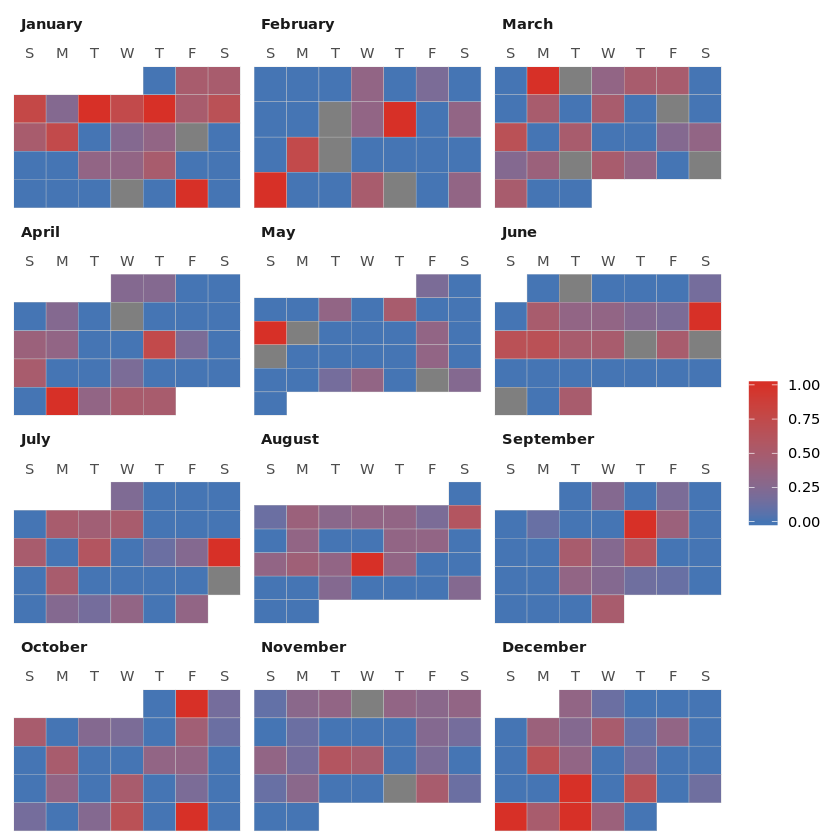

In [25]:
library(ggcal)
pal = scale_fill_gradient(low="#4575b4", high="#d73027")
ggcal(infoAA$Data, infoAA$Perc) + pal